In [1]:
from DataLoader import DataLoader
from Utility import *

dataloader = DataLoader()
dataloader.load_paths("paths_finished.tsv") 
dataloader.load_edges("links.tsv") 

In [2]:
posterior_probs = compute_posteriors(dataloader.paths, dataloader.edges)

In [ ]:
posteriors_with_pagerank = pd.merge(posterior_probs, dataloader.pagerank, on='Current_A', how='left')

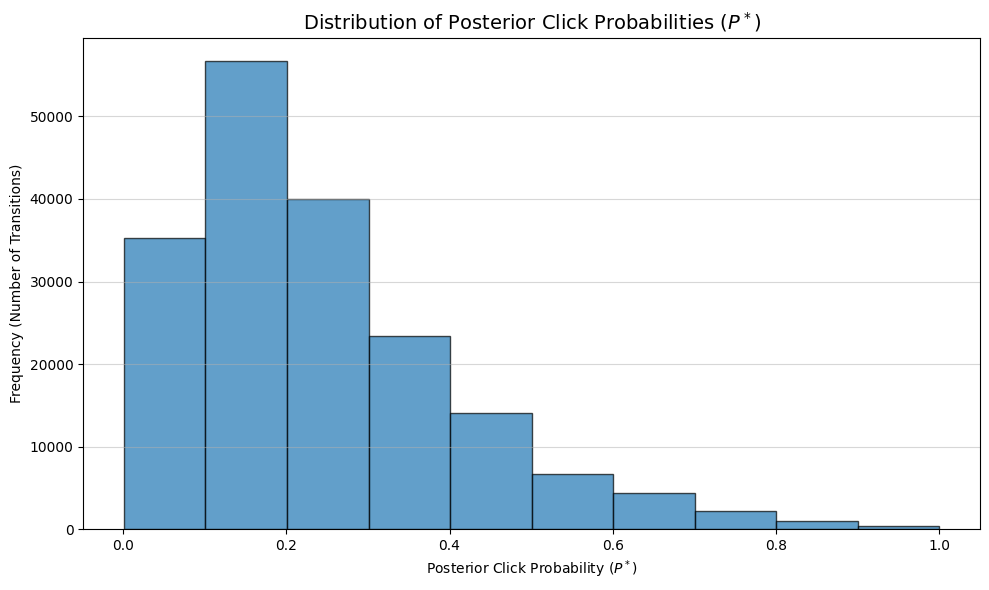

In [4]:
import matplotlib.pyplot as plt

# Filter out potential NaNs
p_star_data = posterior_probs['P_star'].dropna()

plt.figure(figsize=(10, 6))
plt.hist(p_star_data, bins=10, edgecolor='black', alpha=0.7)
plt.title('Distribution of Posterior Click Probabilities ($P^*$)', fontsize=14)
plt.xlabel('Posterior Click Probability ($P^*$)')
plt.ylabel('Frequency (Number of Transitions)')
plt.grid(axis='y', alpha=0.5)
plt.tight_layout()
plt.show()